# COGS 108 Group 166 - Final Project

# Overview

Our primary focus with this project centralizes around the analysis of song lyrics in order to predict popularity. We use data from the Billboard Top 100 ranging from the decade of 2009 - 2018 to determine whether words should be repeated for the sake of increasing popularity, as well as whether a song's popularity is linked to its genre, and how positive/negative popular song lyrics are. In doing this analysis, we hope to bring insightful knowledge to future artist's careers, in order to show them formulaically that their popularity may drastically alter for the better or worse, if they choose to pursue and focus on a specific genre or use particular diction in their lyrics.

## Group Members/IDs

- George Hong (XXXXXXXXX)
- Bryce Chong (XXXXXXXXX)
- Yi Le Chen (XXXXXXXXX)
- Samruddhi Hande (XXXXXXXXX)
- Jesse Huang (XXXXXXXXX)

## 1. Introduction and Background (Prior Work)

In today's modern society, music is heavily prevalent in our daily lives in some form or another. Whether it be pop, rap, hip hop or even classical, we all have a specific genre that appeals to our particular interests and tastes. With that in mind, we decided to conduct our project on lyrics analysis because we think that analyzing the lyrics used in songs of a specific genre and seeing which words are most present could potentially show us the overall sentiment of the genre. We could then see how that genre's general sentiment compares to other generes' sentiments. This project could also be extremely beneficial to song artists because they can see a variety of factors that can increase their song's popularities amongst their audience. The appeal is justified because we are using the United States Billboard's Top 100 from 2009-2018 to gather data, so we know that the song data we are using is from songs that have performed well amongst the United States. For example, if our analysis were to show that in the rap genre, the general sentiment through 2009-2018 was negative, then artists' could use that data to guide their decision to write rap music that have a negative emotional appeal, such as topics that are typically elicit in terms of negative or sad feelings. Our analysis also performs to indicate how much of that emotion the song should have to reach optimal success amongst its audience. <br>
<br>
We were able to form our hypothesis based on several resources we came across while conducting our research. According to Psychology Today, anger and sadness are on the rise in the music of today, specifically pop music on Billboard's Hot 100 lists. Examples such as these show that a prevailing emotion in music can possibly be correlated with its popularity in Billboard charts. Using this knowledge, we decided to include emotion and its tie to a genre to explore this possible correlation using top 100 charts from Billboard and do a sentiment analysis. A previous sentiment analysis project on lyrics has been done by Kathleen Napier and Lior Shamir, in which they explored the changes in emotion in popular music over time. Their project differed from ours slightly in that they researched the effect of the tune of a song as well as the lyrics on the overall emotion, and how those two factors plus more determine emotion, and also how this emotion in the specific genre of popular music has changed over time. Due to our research ranging from data through 2009-2018, we provide a more recent and current analysis so that artists' today can see what particular emotion is most appealing today.  <br>

References:
- 1) https://www.usatoday.com/story/life/music/2018/01/03/rap-overtakes-rock-most-popular-genre-among-music-fans-heres-why/990873001/
- 2) https://www.psychologytoday.com/intl/blog/the-athletes-way/201901/anger-and-sadness-are-the-rise-in-popular-music-lyrics
- 3) https://jpms.ucpress.edu/content/30/4/161
- 4) https://ipfs.io/ipfs/QmXoypizjW3WknFiJnKLwHCnL72vedxjQkDDP1mXWo6uco/wiki/Repetition_(music).html

# 2a. Research Question

Based on the past decade of 2009 - 2018, how can we use the following questions and the data they pertain to predict future popularity in songs?



> 1. What topic should you write your song about based on what words are most popular?
2. How repetitive should your song be?
3. What genre should you pick to write a song in?<br>
4. How positive or negative should your song be? <br>

To look into each subquestion, we will use the following metrics:
> 1. Place the top 10 words per song into a list. Calcute frequency of these top 10 words to measure the topic of the song.
2. Calculate the repetition percentage for each song. Average the percentages for each genre.
3. Loop through the original dataset of Top 100 BillBoard Songs list and count percentages of each genre in each week. <br>
4. Use new genre song lists to get the compound value (using VADER) per song. Average across each genre. <br>


Therefore, we have 4 features: 
> 1. Word frequency
2. Repetition
3. Genre <br>
4. Polarity <br>








# 2b. Hypothesis

With prior knowledge that popular songs found in this decade's Billboard Top 100 music charts are usually linked to the typical/avid teen and adult listeners, as well as finding references regarding the rise of negative music, we hypothesize that by utilizing the various metrics measured for our data, we will see that repetitive lyrics in songs and containing an overarching negative emotional message, regardless of genre, are highly likely to be popular in future songs.




# 3a. Dataset(s)

- Dataset Name: billboard_2000_2018_spotify_lyrics
- Link to the dataset: https://docs.google.com/spreadsheets/d/1y0AzUAKQT0boOmGuruFXVD5L7oMjoT33ENKTDluwkhE/edit#gid=1751148220
- Number of observations: 7573

This dataset contains the data of the Billboard top 100 songs in the United States from the year 2000 to the year 2018. The data provided per song is date, year,	title, artist,	main artist, peak position,	last position, weeks,	rank,	change,	spotify link,	spotify id,	video link,	genre,	broad genre,	analysis url,	energy,	liveness,	tempo,	speechiness,	acousticness,	instrumentalness,	time signature,	danceability,	key,	duration in ms,	loudness,	valence	mode,	and lyrics.		

# 3b. Setup

In [105]:
# Core imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

# Imports for reading and writing out to files
import csv
import json
import sys
import re
import string    

# For word frequency
import nltk

# For stats models
import patsy
import statsmodels.api as sm

# 4. Data Cleaning

Our goal with cleaning the our dataset was to split the songs by their genre where each song would only be assigned one genre. The large dataset is split into six new dataframes separated by genre (pop, country, r&b, edm, rap, & rock) and songs that did not fit into one of these genres would be placed in an unknown category that would not be used in our analysis. The only columns that we would use from the original dataset include the song title, artist, lyrics, boad_genre, year & peak_position. The artist and song title would only be used to obtain missing song lyrics or broad_genres for a song by using the Spotify and Genius API. Our analysis would look at the lyrics, year, genre, & peak position for each song.


In [0]:
# Spotify API 
%pip install spotipy
import spotipy
import spotipy.util as util

# Genius API 
%pip install lyricsgenius
import lyricsgenius 

We would use the Spotify API to get the missing broad_genres for a song by searching up the artist. The Genius API is used to get the missing lyrics by passing in the artists and song title.

In [0]:
# Initialize Spotify API to get artist genre 
from spotipy.oauth2 import SpotifyClientCredentials
client_credentials_manager = SpotifyClientCredentials(client_id='a8aaea3c455945\
0087a07be4c398f692', client_secret='ec005734a73849de915f02cfae843c5e')
token = client_credentials_manager.get_access_token()
spotify = spotipy.Spotify(auth=token)

# Initialize Genius API to search for song lyrics
genius = lyricsgenius.Genius("5k8IZo1Alrk_KsaxOpQOxayHRo5_GojdZtppTa44KJQQFuWu\
8HBzhoBFD4_L1mpi")

Get the csv file that we got online which includes information about all the songs from 2000-2018. We drop all the songs before 2008 because we are only analyzing songs from 2009-2018

In [5]:
# Load in the Billboard Lyrics Dataset
dataset_path = 'billboard_2000_2018_spotify_lyrics.csv'
dataset_master = pd.read_csv(dataset_path,encoding = 'latin-1')

# Remove data from before 2008
for i in range(len(dataset_master['title'])-1,-1,-1):
  month,day,year = dataset_master['date'].loc[i].split('/')
  dataset_master.at[i,'date'] = int(year)
  if(int(year)<9):
    dataset_master = dataset_master.drop([i])

dataset_master.tail()

,date,year,title,simple_title,artist,main_artist,peak_pos,last_pos,weeks,rank,...,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode,lyrics
4502,9,2009.0,My Life,my life,the game,the game,21,64,20,74,...,0.0773,0,4,0.671,8,320893,-5.093,0.382,0,And I'm grindin' till I'm tired\n'Cause they s...
4503,9,2009.0,What About Now,what about now,daughtry,daughtry,18,85,20,85,...,0.0629,0,4,0.363,9,250311,-2.826,0.275,0,Shadows fill an empty heart\nAs love is fading...
4504,9,2009.0,Let It Go,let it go,tim mcgraw,tim mcgraw,47,68,15,82,...,0.0757,0,4,0.437,1,223947,-4.819,0.527,1,I been caught sideways out here on the crossro...
4505,9,2009.0,Anything Goes,anything goes,randy houser,randy houser,92,92,5,98,...,0.54,0.000115,4,0.477,0,184173,-4.77,0.28,1,Normally this time of night you wouldn't find ...
4506,9,2009.0,RUN,run,leona lewis,leona lewis,81,0,1,81,...,0.43,5.61E-06,4,0.302,5,314720,-6.166,0.0932,0,I'll sing it one last time for you\nThen we re...


This function is used to remove the duplicate songs from the csv file.

In [0]:
def remove_duplicates(data):
  # Loop through each dataset and remove repeat occurrences of songs
  dict_songs = {}
  repeat_indices = []; 
  # Keeping this because removing as I go will change the index so I will remove
  # the songs from the highest index first after iterating.
  for i in range(0,data['broad_genre'].size-1):
    dict_key = (str(data['title'][i]) + ' ' + str(data['artist'][i]).strip())
    if dict_key in dict_songs:
      repeat_indices.append(i)
    elif (data['artist'][i] == 'glee cast'):
      repeat_indices.append(i)
    else:
      dict_songs[dict_key] = dict_key
  
  # Remove the duplicates
  for i in range(len(repeat_indices)-1,-1,-1):
    data = data.drop(data.index[repeat_indices[i]])
  return data

There are missing broad_genres for some of the songs so we need to fill in these missing values by searching using the Spotify API.

In [0]:
# Find genres that are missing 
null_genres = pd.isnull(dataset_master['broad_genre'])
for i in range(len(null_genres)):
  if(null_genres[i] == True or dataset_master['broad_genre'][i] == "unknown"):
    artist = re.split('feat. | and | & |\, |\+ |ft. |featurnig |featruing |Featuring\
    |x | X', str(dataset_master["artist"][i]))[0].strip()
    # Use spotify to search the genre of the artist 
    try:
      results = spotify.search(q='artist:' + artist, type='artist')
      song_genres = results["artists"]["items"][0]["genres"]
    # If artist is not available there is no genre
    except IndexError:
      song_genres = []
      dataset_master["broad_genre"].at[i] = "unknown"
      print(dataset_master["artist"][i])
           
    for j in range(len(song_genres)):
      
      if(song_genres[j] == "pop"):
        dataset_master["broad_genre"].at[i] = "pop"
        break
      if(song_genres[j] == "country"):
        dataset_master["broad_genre"].at[i] = "country"
        break
      if(song_genres[j] == "r&b"):
        dataset_master["broad_genre"].at[i] = "r&b"
        break
      if(song_genres[j] == "rap"):
        dataset_master["broad_genre"].at[i] = "rap"
        break
      if(song_genres[j] == "rock"):
        dataset_master["broad_genre"].at[i] = "rock"
        break
      if(song_genres[j] == "edm"):
        dataset_master["broad_genre"].at[i] = "edm"
        break  
      else:
        dataset_master["broad_genre"].at[i] = "unknown"

Separate the large dataset into six different genres and remove the duplicates. Reset the indices so we are able to iterate through the dataframes.

In [0]:
# Separate Datasets into genres
data_pop = dataset_master.loc[dataset_master['broad_genre'] == 'pop']
data_country = dataset_master.loc[dataset_master['broad_genre'] == 'country']
data_rb = dataset_master.loc[dataset_master['broad_genre'] == 'r&b']
data_rap =  dataset_master.loc[dataset_master['broad_genre'] == 'rap']
data_rock =  dataset_master.loc[dataset_master['broad_genre'] == 'rock']
data_edm =  dataset_master.loc[dataset_master['broad_genre'] == 'edm']
data_other =  dataset_master.loc[dataset_master['broad_genre'] == 'unknown']

# Reset all the indices
data_pop = data_pop.reset_index(drop=True)
data_country = data_country.reset_index(drop=True)
data_rb = data_rb.reset_index(drop=True)
data_rap = data_rap.reset_index(drop=True)
data_rock = data_rock.reset_index(drop=True)
data_edm = data_edm.reset_index(drop=True)
data_other = data_other.reset_index(drop=True)

data_pop = remove_duplicates(data_pop)
data_country = remove_duplicates(data_country)
data_rb = remove_duplicates(data_rb)
data_rap = remove_duplicates(data_rap)
data_rock = remove_duplicates(data_rock)
data_edm = remove_duplicates(data_edm)
data_other = remove_duplicates(data_other)

data_pop = data_pop.reset_index(drop =True)
data_country = data_country.reset_index(drop =True)
data_rb = data_rb.reset_index(drop =True)
data_rap = data_rap.reset_index(drop =True)
data_rock = data_rock.reset_index(drop =True)
data_edm = data_edm.reset_index(drop =True)
data_other = data_other.reset_index(drop =True)

This function gets the missing lyrics for a song. If the lyrics are not available on Genius then the lyrics will remain blank. Need to get rid of featuring artists and other delimiters in order to search for the song using the Genius function. We remove brackets, parentheses, and other delimiters before save the lyrics to the song object. Each song object contains four attributes: title, artist, year, lyrics, & peak_position. These songs would be appended to a dataframe based on their genre.

In [0]:
# Create function to append values to json object. Each song object will have
# Song Title, Artist, Lyrics, Year and be placed in each genre
def to_json(data, genres):
  
  for i in range(len(data)):
    tmp_song = {}
    # Remove Featuring Artists and other delimiters
    data["artist"][i] = re.split('feat. | and | & |\, |\+ |ft. |featurnig |featruing \
    |Featuring |x | X', str(data["artist"][i]))[0].strip()
    
    # Initialize tmp_song object
    # Remove the parentheses and  all the content within them
    tmp_song["title"] = re.sub(r'\(.*\)', '', str(data["title"][i])).strip()
    tmp_song["year"] = data["date"][i]
    tmp_song["artist"] = data["artist"][i]
    tmp_song["lyrics"] = data["lyrics"][i]
    
    # If peak position is null initialize it to 0
    if(data["peak_pos"][i]):
      tmp_song["peak_position"] = int(0)
    else:
      tmp_song["peak_position"] = int(data["peak_pos"][i])
    
    # If song is not available from original dataset get it on genius
    if(tmp_song["lyrics"] == "NaN" or tmp_song["lyrics"] == \
       "Error: Could not find lyrics."):
      # Search the Song
      song = genius.search_song(tmp_song["title"], tmp_song["artist"])
      try:
        tmp_song["lyrics"] = song.lyrics
      # If song is not available on genius get lyrics from different file
      except AttributeError:
        tmp_song["lyrics"] = ''
        print("Error")
  
    # Remove the brackets all the content within the brackets
    tmp_song["lyrics"] = re.sub(r'\[.*\]', '', str(tmp_song["lyrics"]))
    # Remove parentheses
    tmp_song["lyrics"] = re.sub('[\(\)\{\}<>]', '', str(tmp_song["lyrics"]))
    # Remove new line 
    tmp_song["lyrics"] = tmp_song["lyrics"].replace('\n', ' ')
    # Remove extra spaces between words
    tmp_song["lyrics"] = re.sub(r'\s+', ' ', str(tmp_song["lyrics"]))
    # Remove leading white spaces
    tmp_song["lyrics"] = tmp_song["lyrics"].strip()

    # Append each song to its specific genre
    genres[data["broad_genre"][i]].append(tmp_song)

Call the above function to create json files that contain songs for each genre. We would be using this data throughout our analysis.

In [0]:
# JSON object that contains songs split by their genre
genres = {"pop":[], "country":[], "r&b":[], "rap":[], "rock":[], "edm":[], \
          "unknown":[]}

# Append all the songs for each genre to json file

# Pop JSON
to_json(data_pop, genres)
with open('lyricsPop.json', 'a') as json_file:  
  json.dump(genres["pop"], json_file)

# Country JSON
to_json(data_country, genres)
with open('lyricsCountry.json', 'a') as json_file:  
  json.dump(genres["country"], json_file)

# Rock JSON
to_json(data_rock, genres)
with open('lyricsRock.json', 'a') as json_file:  
  json.dump(genres["rock"], json_file)

# R&B JSON
to_json(data_rb, genres)  
with open('lyricsR&B.json', 'a') as json_file:  
  json.dump(genres["r&b"], json_file)

# Rap JSON
to_json(data_rap, genres)
with open('lyricsRap.json', 'a') as json_file:  
  json.dump(genres["rap"], json_file)

# EDM JSON
to_json(data_edm, genres)
with open('lyricsEdm.json', 'a') as json_file:  
  json.dump(genres["edm"], json_file)

Our new dataset contains songs for each genre where each song contains the artist, song title, lyrics, year, and peak_position. We are going to drop the artist and song title columns for privacy/ethical reasons and we only need the remaining data from the other columns to start our analysis

In [106]:
# Get datapath for each genre
df_path_rap = 'lyricsRap.json'
df_path_country = 'lyricsCountry.json'
df_path_edm = 'lyricsEdm.json'
df_path_pop = 'lyricsPop.json'
df_path_rb = 'lyricsR&B.json'
df_path_rock = 'lyricsRock.json'

# Create dataframe for each genre
df_rap = pd.read_json(df_path_rap)
df_country = pd.read_json(df_path_country)
df_edm = pd.read_json(df_path_edm)
df_pop = pd.read_json(df_path_pop)
df_rb = pd.read_json(df_path_rb)
df_rock = pd.read_json(df_path_rock)

# Drop the artist and title for each genre
df_rap = df_rap.drop(['artist', 'title'], axis = 1)
df_country = df_country.drop(['artist', 'title'], axis = 1)
df_edm = df_edm.drop(['artist', 'title'], axis = 1)
df_pop = df_pop.drop(['artist', 'title'], axis = 1)
df_rb = df_rb.drop(['artist', 'title'], axis = 1)
df_rock = df_rock.drop(['artist', 'title'], axis = 1)

In [107]:
# Dataframe format
df_rap.head(10)

,lyrics,peak_position,year
0,"Down the chimney, he will come With his great ...",42,18
1,"Yeah, you supermodel thick Damn, that ass bust...",11,18
2,Find my back in the cold Trapped in another so...,69,18
3,I can still feel the love I can still feel the...,47,18
4,I love all your shit talkin' I love all your s...,67,18
5,"Lil Dicky, ooh Mustard on the beat, ho I woke ...",8,18
6,May I say something to you To give you a true ...,62,18
7,"Some day, some day Some day I'll, I wanna wear...",16,18
8,"Yeah, they wishin' and wishin' and wishin' and...",1,18
9,Yeah I'm workin' on dyin' I'm upset Fifty thou...,19,18


# 5. Data Analysis & Results

## Analysis Part 1: Most Frequent Words/Topics



Import required libraries for analyzing the frequency of lyrics. Need to tokenize, stem, and remove stop words to clean the lyrics for analysis.

In [134]:
#import natural language toolkit
from nltk.probability import FreqDist

# import Word Tokenizer
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()

# Get stop words
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
stop_words.add("i'm")

# Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()

Tokenize the lyrics for each song in all the dataframes.

In [108]:
# Tokenize lyrics
token_rap = []
token_country = []
token_edm = []
token_pop = []
token_rb = []
token_rock = []

for i in range(len(df_rap)):
   token_rap.append(tknzr.tokenize(df_rap['lyrics'][i].lower()))
df_rap['lyrics_token'] = token_rap

for i in range(len(df_country)):
   token_country.append(tknzr.tokenize(df_country['lyrics'][i].lower()))
df_country['lyrics_token'] = token_country

for i in range(len(df_edm)):
   token_edm.append(tknzr.tokenize(df_edm['lyrics'][i].lower()))
df_edm['lyrics_token'] = token_edm

for i in range(len(df_pop)):
   token_pop.append(tknzr.tokenize(df_pop['lyrics'][i].lower()))
df_pop['lyrics_token'] = token_pop

for i in range(len(df_rb)):
   token_rb.append(tknzr.tokenize(df_rb['lyrics'][i].lower()))
df_rb['lyrics_token'] = token_rb

for i in range(len(df_rock)):
   token_rock.append(tknzr.tokenize(df_rock['lyrics'][i].lower()))
df_rock['lyrics_token'] = token_rock

Filter out the stop words for each song in each dataframe.

In [109]:
# Get filtered lyrics without stop words
df_rap['lyrics_stop'] = df_rap['lyrics_token'].apply(lambda x: \
                [item for item in x if item not in stop_words])
df_country['lyrics_stop'] = df_country['lyrics_token'].apply(lambda x: \
                [item for item in x if item not in stop_words])
df_edm['lyrics_stop'] = df_edm['lyrics_token'].apply(lambda x: \
               [item for item in x if item not in stop_words])
df_pop['lyrics_stop'] = df_pop['lyrics_token'].apply(lambda x: \
               [item for item in x if item not in stop_words])
df_rb['lyrics_stop'] = df_rb['lyrics_token'].apply(lambda x: \
             [item for item in x if item not in stop_words])
df_rock['lyrics_stop'] = df_rock['lyrics_token'].apply(lambda x: \
             [item for item in x if item not in stop_words])

Stem all the lyrics for each song in all the dataframes.

In [110]:
# Get stemmed words from filtered lyrics
df_rap['lyrics_stem'] = df_rap['lyrics_stop'].apply(lambda x: \
                       [ps.stem(y) for y in x])
df_country['lyrics_stem'] = df_country['lyrics_stop'].apply(lambda x: \
                    [ps.stem(y) for y in x])
df_edm['lyrics_stem'] = df_edm['lyrics_stop'].apply(lambda x: \
                    [ps.stem(y) for y in x])
df_pop['lyrics_stem'] = df_pop['lyrics_stop'].apply(lambda x: \
                   [ps.stem(y) for y in x])
df_rb['lyrics_stem'] = df_rb['lyrics_stop'].apply(lambda x: \
                    [ps.stem(y) for y in x])
df_rock['lyrics_stem'] = df_rock['lyrics_stop'].apply(lambda x: \
                    [ps.stem(y) for y in x])

Combine all expletive words for each song in the dataframes.

In [111]:
expletives = ['nigga', 'bitch', 'shit', 'fuck', 'hoe']

# Combine all expletives together
for i in range(len(df_rap['lyrics_stem'])):
  for j in range(len(df_rap['lyrics_stem'][i])):
    if( df_rap['lyrics_stem'][i][j] in expletives):
      df_rap['lyrics_stem'][i][j] = 'expletive'

for i in range(len(df_country['lyrics_stem'])):
  for j in range(len(df_country['lyrics_stem'][i])):
    if( df_country['lyrics_stem'][i][j] in expletives):
      df_country['lyrics_stem'][i][j] = 'expletive'

for i in range(len(df_edm['lyrics_stem'])):
  for j in range(len(df_edm['lyrics_stem'][i])):
    if( df_edm['lyrics_stem'][i][j] in expletives):
      df_edm['lyrics_stem'][i][j] = 'expletive'

for i in range(len(df_pop['lyrics_stem'])):
  for j in range(len(df_pop['lyrics_stem'][i])):
    if( df_pop['lyrics_stem'][i][j] in expletives):
      df_pop['lyrics_stem'][i][j] = 'expletive'
      
for i in range(len(df_rb['lyrics_stem'])):
  for j in range(len(df_rb['lyrics_stem'][i])):
    if( df_rb['lyrics_stem'][i][j] in expletives):
      df_rb['lyrics_stem'][i][j] = 'expletive'

for i in range(len(df_rock['lyrics_stem'])):
  for j in range(len(df_rock['lyrics_stem'][i])):
    if( df_rock['lyrics_stem'][i][j] in expletives):
      df_rock['lyrics_stem'][i][j] = 'expletive'

Get the word frequency for stemmed words for each genre.

In [112]:
# Get freq of stemmed words for each song
lyrics_rap = df_rap['lyrics_stem'].apply(pd.Series).stack()
lyrics_country = df_country['lyrics_stem'].apply(pd.Series).stack()
lyrics_edm = df_edm['lyrics_stem'].apply(pd.Series).stack()
lyrics_pop = df_pop['lyrics_stem'].apply(pd.Series).stack()
lyrics_rb = df_rb['lyrics_stem'].apply(pd.Series).stack()
lyrics_rock = df_rock['lyrics_stem'].apply(pd.Series).stack()

Get frequency distribution for each genre using the nltk library.

In [113]:
# calculation word frequency
freq_lyrics_rap = FreqDist(lyrics_rap)
freq_lyrics_country = FreqDist(lyrics_country)
freq_lyrics_edm = FreqDist(lyrics_edm)
freq_lyrics_pop = FreqDist(lyrics_pop)
freq_lyrics_rb = FreqDist(lyrics_rb)
freq_lyrics_rock = FreqDist(lyrics_rock)

# remove punctuation counts
for punc in string.punctuation:
    del freq_lyrics_rap[punc]
    del freq_lyrics_country[punc]
    del freq_lyrics_edm[punc]
    del freq_lyrics_pop[punc]
    del freq_lyrics_rb[punc]
    del freq_lyrics_rock[punc]

We will plot the top 10 words for each genre and also the top 10 topics/relevant words for each genre. The topics and relevant words are words that are nouns or verbs that have more meaning than words such as like, yeah, oh, expletives, etc. These words are chosen within the top 100 most common words for each genre.

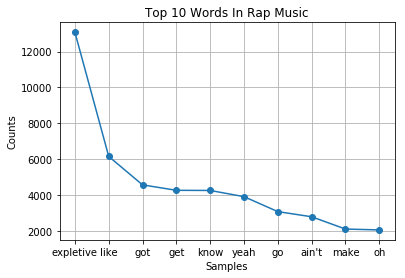

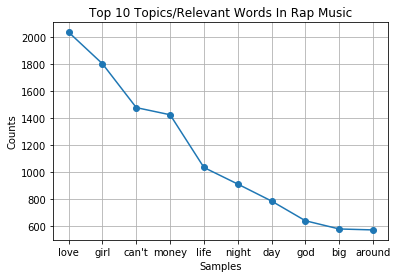

In [19]:
# Frequency Distribution Plot - top 10 words in rap lyrics

top_rap = freq_lyrics_rap.most_common(100)
rap_top = [top_rap[0][0], top_rap[1][0], top_rap[2][0], top_rap[3][0], top_rap[4][0], 
        top_rap[5][0], top_rap[6][0], top_rap[7][0], top_rap[8][0], top_rap[9][0]]
rap_top_counts = [top_rap[0][1], top_rap[1][1], top_rap[2][1], top_rap[3][1],\
        top_rap[4][1], top_rap[5][1], top_rap[6][1], top_rap[7][1], \
        top_rap[8][1], top_rap[9][1]]
plt.plot(rap_top, rap_top_counts, marker='o')
plt.grid()
plt.xlabel("Samples")
plt.ylabel("Counts")
plt.title("Top 10 Words In Rap Music")
plt.show()

# Frequency Distribution Plot - top 10 most topics/relevant words

rap_topics = [top_rap[10][0], top_rap[15][0], top_rap[27][0], top_rap[28][0], \
            top_rap[39][0], top_rap[44][0], top_rap[53][0], top_rap[70][0], \
            top_rap[83][0], top_rap[85][0]]
rap_counts = [top_rap[10][1], top_rap[15][1], top_rap[27][1], top_rap[28][1],\
            top_rap[39][1], top_rap[44][1], top_rap[53][1], \
            top_rap[70][1], top_rap[83][1], top_rap[85][1]]
plt.plot(rap_topics, rap_counts, marker='o')
plt.grid()
plt.xlabel("Samples")
plt.ylabel("Counts")
plt.title("Top 10 Topics/Relevant Words In Rap Music")
plt.show()

The most common lyrics in rap music over the past decade are mainly expletives and ad-libs(yeah, oh, etc) which are common within main stream rap music.

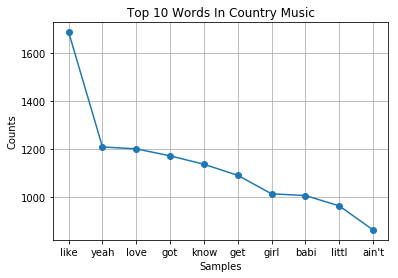

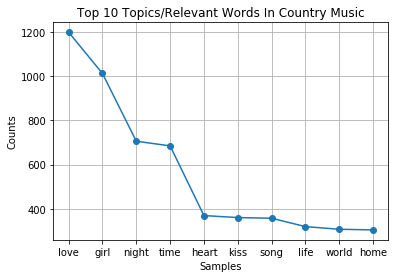

In [20]:
# Frequency Distribution Plot - top 10 words in country lyrics

top_country = freq_lyrics_country.most_common(100)
country_top = [top_country[0][0], top_country[1][0], top_country[2][0],\
            top_country[3][0], top_country[4][0], top_country[5][0], \
            top_country[6][0], top_country[7][0], top_country[8][0], \
            top_country[9][0]]
country_top_counts = [top_country[0][1], top_country[1][1], top_country[2][1], \
            top_country[3][1], top_country[4][1], top_country[5][1], \
        top_country[6][1], top_country[7][1], top_country[8][1], \
        top_country[9][1]]
plt.plot(country_top, country_top_counts, marker='o')
plt.grid()
plt.xlabel("Samples")
plt.ylabel("Counts")
plt.title("Top 10 Words In Country Music")
plt.show()

# Frequency Distribution Plot - top 10 most topics/relevant words

country_topics = [top_country[2][0], top_country[6][0], top_country[15][0], \
            top_country[16][0], top_country[40][0], top_country[44][0], \
            top_country[45][0], top_country[54][0], top_country[57][0], \
          top_country[58][0]]
country_counts = [top_country[2][1], top_country[6][1], top_country[15][1], 
        \top_country[16][1], top_country[40][1], top_country[44][1], \
        top_country[45][1], top_country[54][1], top_country[57][1], \
        top_country[58][1]]
plt.plot(country_topics, country_counts, marker='o')
plt.grid()
plt.xlabel("Samples")
plt.ylabel("Counts")
plt.title("Top 10 Topics/Relevant Words In Country Music")
plt.show()


The most common lyrics in country music are mostly positive and do not contain words that are usually popular among the younger generation.

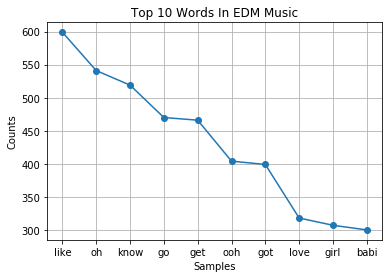

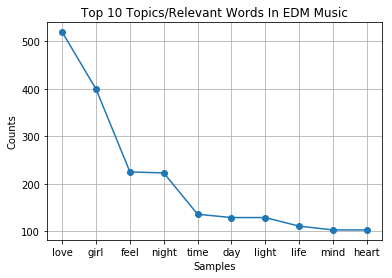

In [21]:
# Frequency Distribution Plot - top 10 words in Edm lyrics

top_edm = freq_lyrics_edm.most_common(100)
edm_top = [top_edm[0][0], top_edm[1][0], top_edm[2][0], \
    top_edm[3][0], top_edm[4][0],  top_edm[5][0], \
    top_edm[6][0], top_edm[7][0], top_edm[8][0], \
    top_edm[9][0]]
edm_top_counts = [top_edm[0][1], top_edm[1][1], top_edm[2][1], \
        top_edm[3][1], top_edm[4][1], top_edm[5][1], \
        top_edm[6][1], top_edm[7][1], top_edm[8][1], \
        top_edm[9][1]]
plt.plot(edm_top, edm_top_counts, marker='o')
plt.grid()
plt.xlabel("Samples")
plt.ylabel("Counts")
plt.title("Top 10 Words In EDM Music")
plt.show()

# Frequency Distribution Plot - top 10 most topics/relevant words

edm_topics = [top_edm[7][0], top_edm[8][0], top_edm[11][0], top_edm[21][0], \
    top_edm[22][0], top_edm[38][0], top_edm[44][0], \
    top_edm[47][0], top_edm[62][0], top_edm[65][0]]
edm_counts = [top_edm[2][1], top_edm[6][1], top_edm[15][1], top_edm[16][1], \
    top_edm[40][1], top_edm[44][1], top_edm[45][1], top_edm[54][1],\
    top_edm[57][1], top_edm[58][1]]
plt.plot(edm_topics, edm_counts, marker='o')
plt.grid()
plt.xlabel("Samples")
plt.ylabel("Counts")
plt.title("Top 10 Topics/Relevant Words In EDM Music")
plt.show()


The most common lyrics in edm music relate to sensual feelings which is common since this genre is often listened by people at nightclubs, festivals, & raves.

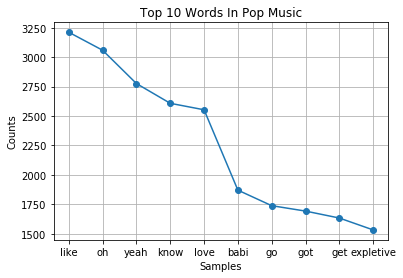

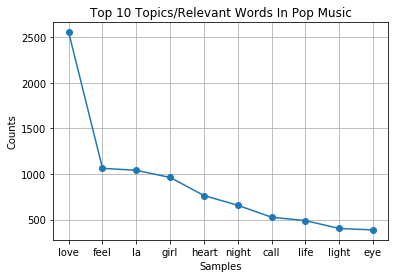

In [22]:
# Frequency Distribution Plot - top 10 words in Pop lyrics

top_pop = freq_lyrics_pop.most_common(100)
pop_top = [top_pop[0][0], top_pop[1][0], top_pop[2][0], top_pop[3][0], \
    top_pop[4][0], top_pop[5][0], top_pop[6][0], top_pop[7][0], \
    top_pop[8][0], top_pop[9][0]]
pop_top_counts = [top_pop[0][1], top_pop[1][1], top_pop[2][1], top_pop[3][1], \
    top_pop[4][1], top_pop[5][1], top_pop[6][1], top_pop[7][1], \
    top_pop[8][1], top_pop[9][1]]
plt.plot(pop_top, pop_top_counts, marker='o')
plt.grid()
plt.xlabel("Samples")
plt.ylabel("Counts")
plt.title("Top 10 Words In Pop Music")
plt.show()

# Frequency Distribution Plot - top 10 most topics/relevant words

pop_topics = [top_pop[4][0], top_pop[21][0], top_pop[24][0], top_pop[26][0], \
    top_pop[33][0], top_pop[39][0], top_pop[52][0], top_pop[55][0], \
    top_pop[72][0], top_pop[78][0]]
pop_counts = [top_pop[4][1], top_pop[21][1], top_pop[24][1], top_pop[26][1], \
    top_pop[33][1], top_pop[39][1], top_pop[52][1], top_pop[55][1], \
    top_pop[72][1], top_pop[78][1]]
plt.plot(pop_topics, pop_counts, marker='o')
plt.grid()
plt.xlabel("Samples")
plt.ylabel("Counts")
plt.title("Top 10 Topics/Relevant Words In Pop Music")
plt.show()

The most common lyrics in pop shows relate to the lyrics in most of the other genres since there are many sub-genres of pop.

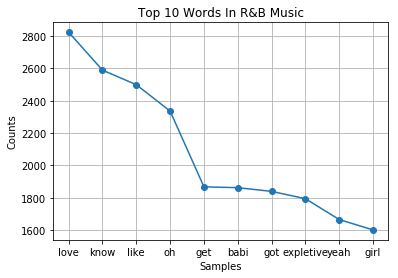

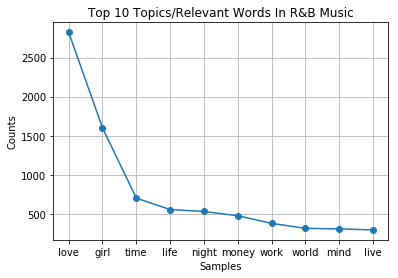

In [23]:
# Frequency Distribution Plot - top 10 words in R&B lyrics

top_rb = freq_lyrics_rb.most_common(100)
rb_top = [top_rb[0][0], top_rb[1][0], top_rb[2][0], top_rb[3][0], \
    top_rb[4][0], top_rb[5][0], top_rb[6][0], top_rb[7][0], \
    top_rb[8][0], top_rb[9][0]]
rb_top_counts = [top_rb[0][1], top_rb[1][1], top_rb[2][1], top_rb[3][1],\
    top_rb[4][1], top_rb[5][1], top_rb[6][1], top_rb[7][1], \
    top_rb[8][1], top_rb[9][1]]
plt.plot(rb_top, rb_top_counts, marker='o')
plt.grid()
plt.xlabel("Samples")
plt.ylabel("Counts")
plt.title("Top 10 Words In R&B Music")
plt.show()

# Frequency Distribution Plot - top 10 most topics/relevant words

rb_topics = [top_rb[0][0], top_rb[9][0], top_rb[29][0], top_rb[35][0], \
        top_rb[39][0], top_rb[47][0], top_rb[56][0], top_rb[71][0], \
    top_rb[74][0], top_rb[77][0]]
rb_counts = [top_rb[0][1], top_rb[9][1], top_rb[29][1], top_rb[35][1],\
    top_rb[39][1],  top_rb[47][1], top_rb[56][1], top_rb[71][1], \
    top_rb[74][1], top_rb[77][1]]
plt.plot(rb_topics, rb_counts, marker='o')
plt.grid()
plt.xlabel("Samples")
plt.ylabel("Counts")
plt.title("Top 10 Topics/Relevant Words In R&B Music")
plt.show()

The most common lyrics in r&b are similar to the lyrics in rap music since these two genres are often mixed together in most mainstream music.

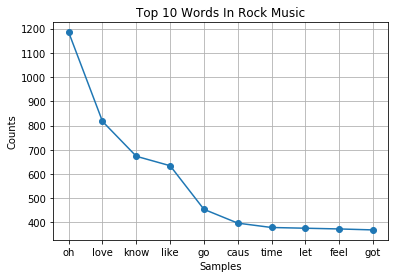

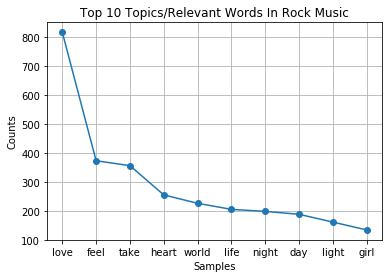

In [24]:
# Frequency Distribution Plot - top 10 words in Rock lyrics

top_rock = freq_lyrics_rock.most_common(100)
rock_top = [top_rock[0][0], top_rock[1][0], top_rock[2][0], top_rock[3][0], \
    top_rock[4][0], top_rock[5][0], top_rock[6][0], top_rock[7][0], \
    top_rock[8][0], top_rock[9][0]]
rock_top_counts = [top_rock[0][1], top_rock[1][1], top_rock[2][1], top_rock[3][1], \
    top_rock[4][1], top_rock[5][1], top_rock[6][1], top_rock[7][1], \
    top_rock[8][1], top_rock[9][1]]
plt.plot(rock_top, rock_top_counts, marker='o')
plt.grid()
plt.xlabel("Samples")
plt.ylabel("Counts")
plt.title("Top 10 Words In Rock Music")
plt.show()

# Frequency Distribution Plot - top 10 most topics/relevant words

rock_topics = [top_rock[1][0], top_rock[8][0], top_rock[11][0], top_rock[24][0], \
    top_rock[29][0], top_rock[36][0], top_rock[39][0], top_rock[43][0], \
    top_rock[54][0], top_rock[69][0]]
rock_counts = [top_rock[1][1], top_rock[8][1], top_rock[11][1], top_rock[24][1], \
    top_rock[29][1], top_rock[36][1], top_rock[39][1], top_rock[43][1], \
    top_rock[54][1], top_rock[69][1]]
plt.plot(rock_topics, rock_counts, marker='o')
plt.grid()
plt.xlabel("Samples")
plt.ylabel("Counts")
plt.title("Top 10 Topics/Relevant Words In Rock Music")
plt.show()

The most common lyrics in rock music mostly consist of positive words like country music and often does not use words that are common within mainstream music.

Pop music can be seen as the center of most of these genres because the lyrics used in pop music can be seen in all of the other genres. The two most related genres are R&B and Rap where the most common topics are love and money. The songs in these two genres often contain the most expletives so are more popular among the younger generation while Country & Rock do not contain that many expletives and have more positive lyrics. EDM music is usually upbeat or mellow so it is similar to Pop and R&B music. EDM music usually focuses on the beat/melody rather than the lyrics so there should be a lower frequency of distinct words. Overall, the most common topic throughout all of the genres is love.

## Analysis Part 2: Lyrics Repetition

This part of the analysis focuses on how repetitive the lyrics in a song is. It is important to know not only which words to put in a song, but also how many times you should repeat the phrase/word. The amount of repetition can also depend on the genre. This analysis will find the averaged percentage of repetition across genre. 

Firstly, the lyrics are stripped of punctuation. This is because the .split() method categorizes words differently with punctuation. Example: "**love,**" would be different to "**love**". However, we do not need this distinction, so the punctuation of all words are taken out. The set() function gives us a set of all unique words in a particular song. Then, the percentage of unique words is calculated, so the percentage of repetition can be calculated.  We add up all the perecentages of every song in a genre, and then average it. 
This is done for each genre, which is stated in the comments (the code is the same for each genre).

In [25]:
############# COUNTRY #############
country_lyrics= ""
sum_value = 0

for index,row in df_country.iterrows():
  country_lyrics = (row['lyrics'])
  
  # Remove punctuation from lyrics
  table = str.maketrans({key: None for key in string.punctuation})
  cleaned_country_lyrics = country_lyrics.translate(table) 
  
  # List of strings for each word
  split_lyrics = cleaned_country_lyrics.split(' ')
  
  # Separate unique words
  unique_words = set(split_lyrics)

  # Number of words in original lyrics
  num_original = len(split_lyrics)
  
  # Number of unique words
  num_unique = len(unique_words)
  
  # Find percentage of repeated words
  percentage_unique = (num_unique/num_original) * 100
  percentage_repeated = 100 - percentage_unique
  
  # Add to running total
  sum_value += percentage_repeated
  
# Average across all songs
country_ave = sum_value/len(df_country.index)

In [26]:
############# EDM #############
EDM_lyrics= ""
sum_value = 0

for index,row in df_edm.iterrows():
  EDM_lyrics = (row['lyrics'])
  
  # Remove punctuation from lyrics
  table = str.maketrans({key: None for key in string.punctuation})
  cleaned_EDM_lyrics = EDM_lyrics.translate(table) 
  
  # List of strings for each word
  split_lyrics = cleaned_EDM_lyrics.split(' ')
  
  # Separate unique words
  unique_words = set(split_lyrics)

  # Number of words in original lyrics
  num_original = len(split_lyrics)
  
  # Number of unique words
  num_unique = len(unique_words)
  
  # Find percentage of repeated words
  percentage_unique = (num_unique/num_original) * 100
  percentage_repeated = 100 - percentage_unique
  
  # Add to running total
  sum_value += percentage_repeated
  
# Average across all songs
EDM_ave = sum_value/len(df_edm.index)

In [27]:
############# POP #############
pop_lyrics= ""
sum_value = 0

for index,row in df_pop.iterrows():
  pop_lyrics = (row['lyrics'])
  
  # Remove punctuation from lyrics
  table = str.maketrans({key: None for key in string.punctuation})
  cleaned_pop_lyrics = pop_lyrics.translate(table) 
  
  # List of strings for each word
  split_lyrics = cleaned_pop_lyrics.split(' ')
  
  # Separate unique words
  unique_words = set(split_lyrics)

  # Number of words in original lyrics
  num_original = len(split_lyrics)
  
  # Number of unique words
  num_unique = len(unique_words)
  
  # Find percentage of repeated words
  percentage_unique = (num_unique/num_original) * 100
  percentage_repeated = 100 - percentage_unique
  
  # Add to running total
  sum_value += percentage_repeated
  
# Average across all songs
pop_ave = sum_value/len(df_pop.index)

In [28]:
############# R&B #############
RB_lyrics= ""
sum_value = 0

for index,row in df_rb.iterrows():
  RB_lyrics = (row['lyrics'])
  
  # Remove punctuation from lyrics
  table = str.maketrans({key: None for key in string.punctuation})
  cleaned_RB_lyrics = RB_lyrics.translate(table) 
  
  # List of strings for each word
  split_lyrics = cleaned_RB_lyrics.split(' ')
  
  # Separate unique words
  unique_words = set(split_lyrics)

  # Number of words in original lyrics
  num_original = len(split_lyrics)
  
  # Number of unique words
  num_unique = len(unique_words)
  
  # Find percentage of repeated words
  percentage_unique = (num_unique/num_original) * 100
  percentage_repeated = 100 - percentage_unique
  
  # Add to running total
  sum_value += percentage_repeated
  
# Average across all songs
RB_ave = sum_value/len(df_rb.index)

In [29]:
############# RAP #############
rap_lyrics= ""
sum_value = 0

for index,row in df_rap.iterrows():
  rap_lyrics = (row['lyrics'])
  
  # Remove punctuation from lyrics
  table = str.maketrans({key: None for key in string.punctuation})
  cleaned_rap_lyrics = rap_lyrics.translate(table) 
  
  # List of strings for each word
  split_lyrics = cleaned_rap_lyrics.split(' ')
  
  # Separate unique words
  unique_words = set(split_lyrics)

  # Number of words in original lyrics
  num_original = len(split_lyrics)
  
  # Number of unique words
  num_unique = len(unique_words)
  
  # Find percentage of repeated words
  percentage_unique = (num_unique/num_original) * 100
  percentage_repeated = 100 - percentage_unique
  
  # Add to running total
  sum_value += percentage_repeated
  
# Average across all songs
rap_ave = sum_value/len(df_rap.index)

In [30]:
############# ROCK #############
rock_lyrics= ""
sum_value = 0

for index,row in df_rock.iterrows():
  rock_lyrics = (row['lyrics'])
  
  # Remove punctuation from lyrics
  table = str.maketrans({key: None for key in string.punctuation})
  cleaned_rock_lyrics = rock_lyrics.translate(table) 
  
  # List of strings for each word
  split_lyrics = cleaned_rock_lyrics.split(' ')
  
  # Separate unique words
  unique_words = set(split_lyrics)

  # Number of words in original lyrics
  num_original = len(split_lyrics)
  
  # Number of unique words
  num_unique = len(unique_words)
  
  # Find percentage of repeated words
  percentage_unique = (num_unique/num_original) * 100
  percentage_repeated = 100 - percentage_unique
  
  # Add to running total
  sum_value += percentage_repeated
  
# Average across all songs
rock_ave = sum_value/len(df_rock.index)

Create a bar graph to show the different percentages of repetition for each genre. The specific values are shown for every bar. 

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')


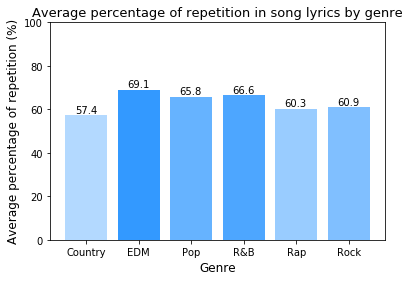

In [31]:
# Bar graph (x-axis: genre, y-axis: percentage of repetition)
genres = ['Country', 'EDM', 'Pop', 'R&B', 'Rap', 'Rock']
percentages = [country_ave, EDM_ave, pop_ave, RB_ave, rap_ave, rock_ave]

fig, ax = plt.subplots()    
index = np.arange(len(genres))
plt.bar(index, percentages)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Average percentage of repetition (%)', fontsize=12)
plt.ylim(ymin=0, ymax=100) 
plt.xticks(index, genres, fontsize=10)
plt.bar(index, percentages, color=['#b3d9ff', '#3399ff', '#66b3ff', '#4da6ff',\
                            '#99ccff', '#80bfff'])
plt.title('Average percentage of repetition in song lyrics by genre', fontsize=13)
rounded_percentages = (round(country_ave, 1), round(EDM_ave, 1), round(pop_ave, 1)\
                , round(RB_ave, 1), round(rap_ave, 1), round(rock_ave, 1))
for i, v in enumerate(rounded_percentages):
    ax.text(i - 0.22, v + 1, str(v))
plt.show()



The graph above shows the average percentage of repetition across all song lyrics for each genre. From it, we can see that EDM has the highest percentage repetition, closely followed by R&B and Pop. Country has the lowest. However, the range is not very large (69.1 - 57.4 = 11.7%). This suggests that songs that reach Top 100 generally have more repeating words than non-repeating ones. 

One inference from the graph is that having a repeating phrase (or chorus) may be a reason why songs become popular. This is because repeated phrases tend to have a catchy tune associated to them, so listeners get the catchy tune stuck in their heads, making them listen to the song more. 

If a songwriter wanted their song to become mainstream popular, they may want to include the amount of repetition in their song shown in the graph, based on which genre they choose. 

Create a repetition function to get the repetition percentage for each song.

In [114]:
def repetition(df):
  lyrics = ""
  repetition = list()

  for index,row in df.iterrows():
    lyrics = (row['lyrics'])
  
    # Remove punctuation from lyrics
    table = str.maketrans({key: None for key in string.punctuation})
    cleaned_lyrics = lyrics.translate(table) 
  
    # List of strings for each word
    split_lyrics = cleaned_lyrics.split(' ')
  
    # Separate unique words
    unique_words = set(split_lyrics)

    # Number of words in original lyrics
    num_original = len(split_lyrics)
  
    # Number of unique words
    num_unique = len(unique_words)
    
    # Find percentage of repeated words
    percentage_unique = (num_unique/num_original)
    percentage_repeated = 1 - percentage_unique
  
    repetition.append(percentage_repeated)
  
  df['repetition'] = repetition

Call repetition function to add the repetition values to each song

In [115]:
repetition(df_pop)
repetition(df_rock)
repetition(df_country)
repetition(df_edm)
repetition(df_rb)
repetition(df_rap)

In [116]:
# New data format
df_rap.head(10)

,lyrics,peak_position,year,lyrics_token,lyrics_stop,lyrics_stem,repetition
0,"Down the chimney, he will come With his great ...",42,18,"[down, the, chimney, ,, he, will, come, with, ...","[chimney, ,, come, great, big, smile, find, ev...","[chimney, ,, come, great, big, smile, find, ev...",0.454545
1,"Yeah, you supermodel thick Damn, that ass bust...",11,18,"[yeah, ,, you, supermodel, thick, damn, ,, tha...","[yeah, ,, supermodel, thick, damn, ,, ass, bus...","[yeah, ,, supermodel, thick, damn, ,, ass, bus...",0.536341
2,Find my back in the cold Trapped in another so...,69,18,"[find, my, back, in, the, cold, trapped, in, a...","[find, back, cold, trapped, another, soul, ,, ...","[find, back, cold, trap, anoth, soul, ,, hear,...",0.642412
3,I can still feel the love I can still feel the...,47,18,"[i, can, still, feel, the, love, i, can, still...","[still, feel, love, still, feel, love, still, ...","[still, feel, love, still, feel, love, still, ...",0.538153
4,I love all your shit talkin' I love all your s...,67,18,"[i, love, all, your, shit, talkin, ', i, love,...","[love, shit, talkin, ', love, shit, talkin, ',...","[love, expletive, talkin, ', love, expletive, ...",0.447964
5,"Lil Dicky, ooh Mustard on the beat, ho I woke ...",8,18,"[lil, dicky, ,, ooh, mustard, on, the, beat, ,...","[lil, dicky, ,, ooh, mustard, beat, ,, ho, wok...","[lil, dicki, ,, ooh, mustard, beat, ,, ho, wok...",0.599034
6,May I say something to you To give you a true ...,62,18,"[may, i, say, something, to, you, to, give, yo...","[may, say, something, give, true, knowledge, l...","[may, say, someth, give, true, knowledg, life,...",0.526570
7,"Some day, some day Some day I'll, I wanna wear...",16,18,"[some, day, ,, some, day, some, day, i'll, ,, ...","[day, ,, day, day, i'll, ,, wanna, wear, starr...","[day, ,, day, day, i'll, ,, wanna, wear, starr...",0.609375
8,"Yeah, they wishin' and wishin' and wishin' and...",1,18,"[yeah, ,, they, wishin, ', and, wishin, ', and...","[yeah, ,, wishin, ', wishin, ', wishin, ', wis...","[yeah, ,, wishin, ', wishin, ', wishin, ', wis...",0.582133
9,Yeah I'm workin' on dyin' I'm upset Fifty thou...,19,18,"[yeah, i'm, workin, ', on, dyin, ', i'm, upset...","[yeah, workin, ', dyin, ', upset, fifty, thous...","[yeah, workin, ', dyin, ', upset, fifti, thous...",0.500000


We then see if the repetition values are normally distributed by using the stats.normaltest function. The code will print when a particular dataset, in this case EDM, is not normally distributed using a significance value of 0.001.

In [117]:
alpha = 1e-3

k,p = stats.normaltest(df_pop['repetition'])
if p > alpha:
  print("Pop Repetition is not normally distributed!!!!")
k,p = stats.normaltest(df_rap['repetition'])
if p > alpha:
  print("Rap Repetition is not normally distributed!!!!")
k,p = stats.normaltest(df_edm['repetition'])
if p > alpha:
  print("EDM Repetition is not normally distributed!!!!")
k,p = stats.normaltest(df_rock['repetition'])
if p > alpha:
  print("Rock Repetition is not normally distributed!!!!")
k,p = stats.normaltest(df_country['repetition'])
if p > alpha:
  print("Country Repetition is not normally distributed!!!!")
k,p = stats.normaltest(df_rb['repetition'])
if p > alpha:
  print("R&B Repetition is not not normally distributed!!!!")

EDM Repetition is not normally distributed!!!!


This code calculated the standard deviation of each genre's repetition value in order for us to verify that they are similar in order to use ANOVA.

In [118]:
pop_std = stats.tstd(df_pop['repetition'])
rap_std = stats.tstd(df_rap['repetition'])
edm_std = stats.tstd(df_edm['repetition'])
rnb_std = stats.tstd(df_rb['repetition'])
rock_std = stats.tstd(df_rock['repetition'])
country_std = stats.tstd(df_country['repetition'])

print("Pop standard deviation = "+str(pop_std))
print("Rap standard deviation = "+str(rap_std))
print("EDM standard deviation = "+str(edm_std))
print("R&B standard deviation = "+str(rnb_std))
print("Rock standard deviation = "+str(rock_std))
print("Country standard deviation = "+str(country_std))

Pop standard deviation = 0.0955605782558
Rap standard deviation = 0.10908971389
EDM standard deviation = 0.0926869348137
R&B standard deviation = 0.0946262528298
Rock standard deviation = 0.142084883985
Country standard deviation = 0.136031426538


This code calls stats' anova function and returns a p value that we then use to conclude that there is indeed significant difference between the genres for repetition.

In [139]:
f, p = stats.f_oneway(df_pop['repetition'],df_rap['repetition'],\
        df_rock['repetition'],df_country['repetition'],\
        df_rb['repetition'])

alpha = 5e-3
if p < alpha:
    print("There is a significant difference between the groups.")
    print("There is an effect on repetition of being in different genres.")

There is a significant difference between the groups.
There is an effect on repetition of being in different genres.


## Analysis Part 3: Popular Genres

We wanted to see how the trend of different genres in top charts changed over the past 10 years to get clarity on which genre is the most popular. Consequently, this information allows us to help aspiring artists decide on which genre they want to get into in order to be as successful as they can be, assuming they are flexible about the type of music they create.  

In [32]:
def truncate(value):
  return float('%.3f'%(value))

def addCounts(total_counts,df,genre_count):
  for i in range(0,len(df)):
    song = df.loc[i]
    year = song.year - 9 # changed to 0-9 for the list access
    total_counts[year] = total_counts[year] + 1
    genre_count[year] = genre_count[year] + 1
  
def calculatePercent(total_counts,genre_count,percent_list):
  for i in range(0,len(genre_count)):
    percent_list[i] = truncate(genre_count[i]/total_counts[i]*100)

This code will initialize the count lists for each genre. Total_counts holds the number of total songs in each year. index 0 = 2009, index 9 = 2018. Count_genre will hold the counts of songs for that year. Percent_genre will hold the calculated percents of each genre for that years total songs.

In [102]:
# Code for Graph 3

# initialize count lists
total_counts = [0]*10
count_pop = [0]*10
count_rap = [0]*10
count_country = [0]*10
count_rock = [0]*10
count_edm = [0]*10
count_rnb = [0]*10

percent_pop = [0]*10
percent_rap = [0]*10
percent_rock = [0]*10
percent_country = [0]*10
percent_rnb = [0]*10
percent_edm = [0]*10

This code block calls two functions on each genre, addCounts and calculatePercent. AddCounts will loop through the dataset and increase the counter on total_counts and count_genre, in the index corresponding to the year. CalculatePercent will then use those counts to calculate the percentage of songs of a particular genre in that year, and then save it to the corresponding index in percent_genre.

In [103]:
# Count each genre each year
addCounts(total_counts,df_pop,count_pop)
addCounts(total_counts,df_rap,count_rap)
addCounts(total_counts,df_rb,count_rnb)
addCounts(total_counts,df_rock,count_rock)
addCounts(total_counts,df_country,count_country)
addCounts(total_counts,df_edm,count_edm)

# Calculate Percentages
calculatePercent(total_counts,count_pop,percent_pop)
calculatePercent(total_counts,count_rap,percent_rap)
calculatePercent(total_counts,count_country,percent_country)
calculatePercent(total_counts,count_edm,percent_edm)
calculatePercent(total_counts,count_rock,percent_rock)
calculatePercent(total_counts,count_rnb,percent_rnb)

Text(0, 0.5, 'Percentage of Songs in Top 100')

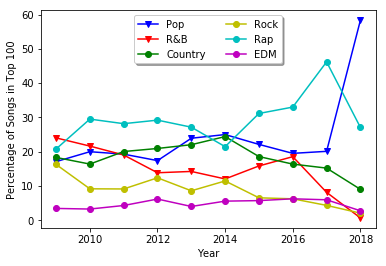

In [104]:
# Graph it
x = [2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]
plt.plot(x,percent_pop,'bv-',label = "Pop")
plt.plot(x,percent_rnb,'rv-',label ="R&B")
plt.plot(x,percent_country,'go-',label ="Country")
plt.plot(x,percent_rock,'yo-',label ="Rock")
plt.plot(x,percent_rap,'co-',label ="Rap")
plt.plot(x,percent_edm,'mo-',label ="EDM")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
plt.xlabel("Year", fontsize = 10)
plt.ylabel("Percentage of Songs in Top 100", fontsize = 10)

This graph shows each genre plotted as a line. The points indicate percentage of songs in top 100 for each year in a 10 year period from 2009-2018. The colorblindness colors(RG, BY) are separated into different shapes for markers. This can be seen as the triangle points for R&B(red) and Pop(blue). The x-axis shows the year and the y-axis shows the percentage of songs of that genre. 


Most of the genres have percentages between 10 and 50% excluding EDM which sports a measly 3-6%. Pop and Country are fairly stable over these last 10 years whereas R&B and Rock seem to have been losing popularity. This seems to fit our observations of songs nowadays as we don't hear R&B and Rock too often on the radio unless they are from hit singers/bands from many years back(Panic at the Disco comes to mind). EDM does seem to be steadily increasing in popularity which could be attributed to the gaining popularity of raves and its culture. 

Rap is the only genre that seems to be gaining more popularity as it is encompassing more and more of top 100 songs reaching 46% in 2017. This seems to correspond to the increasing popularity of "Mumble Rap" which has come into existence in the last some years. There are still many rap artists popping up everyday. Pop had a unbelievably drastic increase in 2018 which could be due to all types of genres adapting a more pop-focused composition resulting in a primary classification of pop(such as pop edm). 

This data is telling us that if you're looking to make it big in the music industry and you want to make music in rock or R&B, you might want to reconsider your genre.

## Analysis Part 4: Polarity

Using VADER Sentiment Analysis, the compound score for each song can be calculated. The compound score provides a measure of polarity, ranging from -1 (very negative) to +1 (very positive). This gives us an understanding of how positive or negative the lyrics in a song are. We average this out per year per genre. 

In [34]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/bcchong/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [35]:
analyzer = SentimentIntensityAnalyzer()

This function obtains sentiment information (compound, pos, neg, neu). We will only look at the compound score as a measure for polarity. 

In [36]:
# Function that outputs DataFrame that stores sentiment information
sum_compound = 0
def get_sentiments(input_list):
  output = pd.DataFrame()
  
  for lyrics in input_list:
    scores = analyzer.polarity_scores(lyrics)
    output = output.append(scores, ignore_index=True)
  
  return output

For each song, we analyze the lyrics through VADER. For all the songs in one year, the compound scores are added up. Then, the average is taken. This is done for each genre, which is stated in the comments (the code is the same for each genre). 

In [37]:
############# POP #############

# Turn the lyrics for each year and into a list
pop_lists = list()
for i in range(9, 19):
  pop_lists.append(list(df_pop[df_pop['year']==i].lyrics))
  
  
# Get the sentiments and compound score for each year(2009-2018), then average
pop_compound_per_year = list()

for i in pop_lists:
  sum_compound_per_year = 0
  count = 0
  pop_sentiments = get_sentiments(i)
  for index, row in pop_sentiments.iterrows():
    val = pop_sentiments.iloc[index]['compound']
    sum_compound_per_year += val
    count += 1
  pop_ave_per_year = sum_compound_per_year/count
  pop_compound_per_year.append(pop_ave_per_year)

In [38]:
############# COUNTRY #############

# Turn the lyrics for each year and into a list
country_lists = list()
for i in range(9, 19):
  country_lists.append(list(df_country[df_country['year']==i].lyrics))
  
  
# Get the sentiments and compound score for each year(2009-2018), then average
country_compound_per_year = list()

for i in country_lists:
  sum_compound_per_year = 0
  count = 0
  country_sentiments = get_sentiments(i)
  for index, row in country_sentiments.iterrows():
    val = country_sentiments.iloc[index]['compound']
    sum_compound_per_year += val
    count += 1
  country_ave_per_year = sum_compound_per_year/count
  country_compound_per_year.append(country_ave_per_year)

In [39]:
############# EDM #############

# Turn the lyrics for each year and into a list
EDM_lists = list()
for i in range(9, 19):
  EDM_lists.append(list(df_edm[df_edm['year']==i].lyrics))
  
  
# Get the sentiments and compound score for each year(2009-2018), then average
EDM_compound_per_year = list()

for i in EDM_lists:
  sum_compound_per_year = 0
  count = 0
  EDM_sentiments = get_sentiments(i)
  for index, row in EDM_sentiments.iterrows():
    val = EDM_sentiments.iloc[index]['compound']
    sum_compound_per_year += val
    count += 1
  EDM_ave_per_year = sum_compound_per_year/count
  EDM_compound_per_year.append(EDM_ave_per_year)

In [40]:
############# R&B #############

# Turn the lyrics for each year and into a list
RB_lists = list()
for i in range(9, 19):
  RB_lists.append(list(df_rb[df_rb['year']==i].lyrics))
  
  
# Get the sentiments and compound score for each year(2009-2018), then average
RB_compound_per_year = list()

for i in RB_lists:
  sum_compound_per_year = 0
  count = 0
  RB_sentiments = get_sentiments(i)
  for index, row in RB_sentiments.iterrows():
    val = RB_sentiments.iloc[index]['compound']
    sum_compound_per_year += val
    count += 1
  RB_ave_per_year = sum_compound_per_year/count
  RB_compound_per_year.append(RB_ave_per_year)

In [41]:
############# RAP #############

# Turn the lyrics for each year and into a list
rap_lists = list()
for i in range(9, 19):
  rap_lists.append(list(df_rap[df_rap['year']==i].lyrics))
  
  
# Get the sentiments and compound score for each year(2009-2018), then average
rap_compound_per_year = list()

for i in rap_lists:
  sum_compound_per_year = 0
  count = 0
  rap_sentiments = get_sentiments(i)
  for index, row in rap_sentiments.iterrows():
    val = rap_sentiments.iloc[index]['compound']
    sum_compound_per_year += val
    count += 1
  rap_ave_per_year = sum_compound_per_year/count
  rap_compound_per_year.append(rap_ave_per_year)

In [42]:
############# ROCK #############

# Turn the lyrics for each year and into a list
rock_lists = list()
for i in range(9, 19):
  rock_lists.append(list(df_rock[df_rock['year']==i].lyrics))
  
  
# Get the sentiments and compound score for each year(2009-2018), then average
rock_compound_per_year = list()

for i in rock_lists:
  sum_compound_per_year = 0
  count = 0
  rock_sentiments = get_sentiments(i)
  for index, row in rock_sentiments.iterrows():
    val = rock_sentiments.iloc[index]['compound']
    sum_compound_per_year += val
    count += 1
  rock_ave_per_year = sum_compound_per_year/count
  rock_compound_per_year.append(rock_ave_per_year)

Create a line graph showing polarity vs. year. Each line represents one genre. There is a dotted line going through polarity=0, just for easier visualization of which area is positive/negative. 

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')


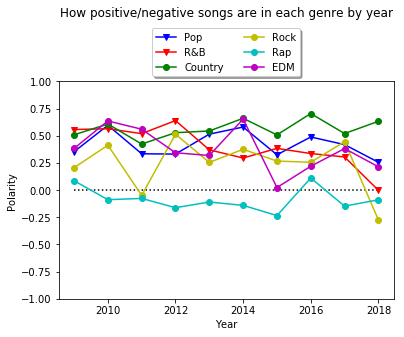

In [43]:
# Line graph (x-axis: year, y-axis: polarity value)
# years = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
# compound_scores = pop_sentiments_2018['compound']

x = [2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]
u = [2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]
v = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
plt.plot(u, v, ':k')
plt.plot(x, pop_compound_per_year,'bv-',label = "Pop")
plt.plot(x, RB_compound_per_year ,'rv-',label ="R&B")
plt.plot(x, country_compound_per_year,'go-',label ="Country")
plt.plot(x, rock_compound_per_year ,'yo-',label ="Rock")
plt.plot(x, rap_compound_per_year ,'co-',label ="Rap")
plt.plot(x, EDM_compound_per_year ,'mo-',label ="EDM")
plt.ylim(ymin=-1, ymax=1) 
plt.legend(loc=8, bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
plt.title('How positive/negative songs are in each genre by year', y=1.27)
plt.xlabel("Year", fontsize = 10)
plt.ylabel("Polarity", fontsize = 10)
plt.show()

The general trend across genres in this graph is that songs that become popular tend to be more positive than negative. The most obvious deviation from this trend is Rap. Rap has mostly been negative, with the exception of 2009 and 2016. This result is not surprising because Rap songs tend to discuss life issues as well as gang related violence. Another noticeable change in time is the trend for Rock. Rock has significantly decreased in positivity from 2017 to 2018, going from mostly positive, to more negative. EDM saw a sharp decrease from 2014 to 2015, but generally stays in the positive area. Country has been stable in being positive. R&B is at a decreasing trend across the years, with 2018 being the most negative compared to previous years. 

From this graph, we can infer that Rap songs have topics that are more negative compared to the rest of the genres. This could be because Rap song lyrics tend to have more words, allowing for heavier topics to be discussed in-depth. 

If a songwriter wanted to figure out how positive or negative they should write their songs, this graph is a good judgement of where to start. 


Create a polarity function to get the polarity percentage for each song.

In [120]:
def polarity(df):
  lyrics = ""
  compounds = list()

  for index,row in df.iterrows():
    lyrics = (row['lyrics'])
    scores = analyzer.polarity_scores(lyrics)
    compounds.append(scores['compound'])
    
  df['polarity'] = compounds

Call the polarity function on the dataframes

In [121]:
polarity(df_pop)
polarity(df_rock)
polarity(df_country)
polarity(df_edm)
polarity(df_rb)
polarity(df_rap)

This code block will use the stats.normaltest function to see whether the genre_df's polarity values are normally distributed. According to this they are all normally distributed with a significance alpha of 0.001

In [122]:
alpha = 1e-3

k,p = stats.normaltest(df_pop['polarity'])
if p > alpha:
  print("Pop Polarity is not normally distributed!!!!")
k,p = stats.normaltest(df_rap['polarity'])
if p > alpha:
  print("Rap Polarity is not normally distributed!!!!")
k,p = stats.normaltest(df_edm['polarity'])
if p > alpha:
  print("EDM Polarity is not normally distributed!!!!")
k,p = stats.normaltest(df_rock['polarity'])
if p > alpha:
  print("Rock Polarity is not normally distributed!!!!")
k,p = stats.normaltest(df_country['polarity'])
if p > alpha:
  print("Country Polarity is not normally distributed!!!!")
k,p = stats.normaltest(df_rb['polarity'])
if p > alpha:
  print("R&B Polarity is not not normally distributed!!!!")

Rap Polarity is not normally distributed!!!!


This code block calls the tstd function to get the standard deviation of each genre's polarity to make sure they are similar before we put it into ANOVA.

In [123]:
pop_std = stats.tstd(df_pop['polarity'])
rap_std = stats.tstd(df_rap['polarity'])
edm_std = stats.tstd(df_edm['polarity'])
rnb_std = stats.tstd(df_rb['polarity'])
rock_std = stats.tstd(df_rock['polarity'])
country_std = stats.tstd(df_country['polarity'])

print("Pop standard deviation = "+str(pop_std))
print("Rap standard deviation = "+str(rap_std))
print("EDM standard deviation = "+str(edm_std))
print("R&B standard deviation = "+str(rnb_std))
print("Rock standard deviation = "+str(rock_std))
print("Country standard deviation = "+str(country_std))

Pop standard deviation = 0.834423293529
Rap standard deviation = 0.926146898341
EDM standard deviation = 0.838342532034
R&B standard deviation = 0.829298355656
Rock standard deviation = 0.840001811247
Country standard deviation = 0.702344813181


We call stats' ANOVA function and get a p value that we compare against a 0.005 significance alpha and conclude that there is a significant difference between the genres for polarity.

In [136]:
f, p = stats.f_oneway(df_edm['polarity'],df_pop['polarity'],df_rap['polarity'],\
                df_rock['polarity'],df_country['polarity'],df_rb['polarity'])

alpha = 5e-3
if p < alpha:
    print("There is a significant difference between the groups.") 
    print("There is an effect on polarity of being in different genres.")

There is a significant difference between the groups.
There is an effect on polarity of being in different genres.


## Analysis Part 5: Multiple Linear Regression
We normalize the peak_position values for each song and compare this variable with the repetition and polarity values for the songs in each genre. We want to know whether there is a higher correlation between these values depending on the genre.

Create functions to normalize the peak_position values for each song so they can be used in the multi linear regression.

In [125]:
# Create function to normalize the peak position on the top 100 Billboard
def normalizePop(num):
    return 1 - num/df_pop['peak_position'].max()
def normalizeCountry(num):
    return 1- num/df_country['peak_position'].max()
def normalizeEdm(num):
    return 1 - num/df_edm['peak_position'].max()
def normalizeRap(num):
    return 1 - num/df_rap['peak_position'].max()
def normalizeRB(num):
    return 1 - num/df_rb['peak_position'].max()
def normalizeRock(num):
    return 1 - num/df_rock['peak_position'].max()
  
# Normalize peak position for each genre
df_pop['peak_position'] = df_pop['peak_position'].apply(normalizePop)
df_country['peak_position'] = df_country['peak_position'].apply(normalizeCountry)
df_edm['peak_position'] = df_edm['peak_position'].apply(normalizeEdm)
df_rap['peak_position'] = df_rap['peak_position'].apply(normalizeRap)
df_rb['peak_position'] = df_rb['peak_position'].apply(normalizeRB)
df_rock['peak_position'] = df_rock['peak_position'].apply(normalizeRock)

In [126]:
# Normalized values
df_rap.head(10)

,lyrics,peak_position,year,lyrics_token,lyrics_stop,lyrics_stem,repetition,polarity
0,"Down the chimney, he will come With his great ...",0.58,18,"[down, the, chimney, ,, he, will, come, with, ...","[chimney, ,, come, great, big, smile, find, ev...","[chimney, ,, come, great, big, smile, find, ev...",0.454545,0.2563
1,"Yeah, you supermodel thick Damn, that ass bust...",0.89,18,"[yeah, ,, you, supermodel, thick, damn, ,, tha...","[yeah, ,, supermodel, thick, damn, ,, ass, bus...","[yeah, ,, supermodel, thick, damn, ,, ass, bus...",0.536341,-0.9954
2,Find my back in the cold Trapped in another so...,0.31,18,"[find, my, back, in, the, cold, trapped, in, a...","[find, back, cold, trapped, another, soul, ,, ...","[find, back, cold, trap, anoth, soul, ,, hear,...",0.642412,0.9994
3,I can still feel the love I can still feel the...,0.53,18,"[i, can, still, feel, the, love, i, can, still...","[still, feel, love, still, feel, love, still, ...","[still, feel, love, still, feel, love, still, ...",0.538153,0.9986
4,I love all your shit talkin' I love all your s...,0.33,18,"[i, love, all, your, shit, talkin, ', i, love,...","[love, shit, talkin, ', love, shit, talkin, ',...","[love, expletive, talkin, ', love, expletive, ...",0.447964,-0.6080
5,"Lil Dicky, ooh Mustard on the beat, ho I woke ...",0.92,18,"[lil, dicky, ,, ooh, mustard, on, the, beat, ,...","[lil, dicky, ,, ooh, mustard, beat, ,, ho, wok...","[lil, dicki, ,, ooh, mustard, beat, ,, ho, wok...",0.599034,-0.9979
6,May I say something to you To give you a true ...,0.38,18,"[may, i, say, something, to, you, to, give, yo...","[may, say, something, give, true, knowledge, l...","[may, say, someth, give, true, knowledg, life,...",0.526570,0.9979
7,"Some day, some day Some day I'll, I wanna wear...",0.84,18,"[some, day, ,, some, day, some, day, i'll, ,, ...","[day, ,, day, day, i'll, ,, wanna, wear, starr...","[day, ,, day, day, i'll, ,, wanna, wear, starr...",0.609375,0.9986
8,"Yeah, they wishin' and wishin' and wishin' and...",0.99,18,"[yeah, ,, they, wishin, ', and, wishin, ', and...","[yeah, ,, wishin, ', wishin, ', wishin, ', wis...","[yeah, ,, wishin, ', wishin, ', wishin, ', wis...",0.582133,0.7321
9,Yeah I'm workin' on dyin' I'm upset Fifty thou...,0.81,18,"[yeah, i'm, workin, ', on, dyin, ', i'm, upset...","[yeah, workin, ', dyin, ', upset, fifty, thous...","[yeah, workin, ', dyin, ', upset, fifti, thous...",0.500000,0.2901


Null Hypothesis: There is no correlation between these two variables <br>
Alternative Hypothesis: There is correlation between these two variables <br>
Significance level: 0.05

In [127]:
# Multiple Linear Regression for Rap
outcome_rap, predictors_rap = patsy.dmatrices('peak_position ~ repetition \
+ polarity', df_rap)
mod_rap = sm.OLS(outcome_rap, predictors_rap)
res_rap = mod_rap.fit()
print(res_rap.summary())

                            OLS Regression Results                            
Dep. Variable:          peak_position   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     6.002
Date:                Wed, 12 Jun 2019   Prob (F-statistic):            0.00255
Time:                        16:48:21   Log-Likelihood:                -271.28
No. Observations:                1160   AIC:                             548.6
Df Residuals:                    1157   BIC:                             563.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3806      0.051      7.478      0.0

Repetition p-value = 0.052 <br>
Polarity p-value = 0.008 <br>
Since 0.052 > 0.05 we accept the null hypothesis <br>
Since 0.008 < 0.05 we accept the alternative hypothesis <br>
There is more correlation between polarity and peak_position than repetition and peak_position in rap music.

In [128]:
# Multiple Linear Regression for Country
outcome_country, predictors_country = patsy.dmatrices('peak_position ~ repetition \
+ polarity', df_country)
mod_country = sm.OLS(outcome_country, predictors_country)
res_country = mod_country.fit()
print(res_country.summary())

                            OLS Regression Results                            
Dep. Variable:          peak_position   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     4.898
Date:                Wed, 12 Jun 2019   Prob (F-statistic):            0.00772
Time:                        16:48:32   Log-Likelihood:                 81.201
No. Observations:                 701   AIC:                            -156.4
Df Residuals:                     698   BIC:                            -142.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3985      0.036     11.219      0.0

Repetition p-value = 0.092 <br>
Polarity p-value = 0.014 <br>
Since 0.092 > 0.05 we accept the null hypothesis <br>
Since 0.014 < 0.05 we accept the alternative hypothesis <br>
There is more correlation between polarity and peak_position than repetition and peak_position in country music.

In [129]:
# Multiple Linear Regression for Edm
outcome_edm, predictors_edm = patsy.dmatrices('peak_position ~ repetition \
+ polarity', df_edm)
mod_edm = sm.OLS(outcome_edm, predictors_edm)
res_edm = mod_edm.fit()
print(res_edm.summary())

                            OLS Regression Results                            
Dep. Variable:          peak_position   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.7736
Date:                Wed, 12 Jun 2019   Prob (F-statistic):              0.463
Time:                        16:48:34   Log-Likelihood:                -56.842
No. Observations:                 187   AIC:                             119.7
Df Residuals:                     184   BIC:                             129.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3251      0.186      1.749      0.0

Repetition p-value = 0.235 <br>
Polarity p-value = 0.853 <br>
Since 0.235 > 0.05 we accept the null hypothesis <br>
Since 0.853 > 0.05 we accept the null hypothesis <br>
There is more correlation between repetition and peak_position than polarity and peak_position in EDM music.

In [130]:
# Multiple Linear Regression for Rock
outcome_rock, predictors_rock = patsy.dmatrices('peak_position ~ repetition \
+ polarity', df_rock)
mod_rock = sm.OLS(outcome_rock, predictors_rock)
res_rock = mod_rock.fit()
print(res_rock.summary())

                            OLS Regression Results                            
Dep. Variable:          peak_position   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     4.399
Date:                Wed, 12 Jun 2019   Prob (F-statistic):             0.0130
Time:                        16:48:35   Log-Likelihood:                -90.636
No. Observations:                 337   AIC:                             187.3
Df Residuals:                     334   BIC:                             198.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2608      0.076      3.414      0.0

Repetition p-value = 0.006 <br>
Polarity p-value = 0.330 <br>
Since 0.006 < 0.05 we accept the alternative hypothesis <br>
Since 0.330 > 0.05 we accept the null hypothesis <br>
There is more correlation between repetition and peak_position than polarity and peak_position in Rock music.

In [131]:
# Multiple Linear Regression for R&B
outcome_rb, predictors_rb = patsy.dmatrices('peak_position ~ repetition \
+ polarity', df_rb)
mod_rb = sm.OLS(outcome_rb, predictors_rb)
res_rb = mod_rb.fit()
print(res_rb.summary())

                            OLS Regression Results                            
Dep. Variable:          peak_position   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     4.467
Date:                Wed, 12 Jun 2019   Prob (F-statistic):             0.0119
Time:                        16:48:39   Log-Likelihood:                -137.26
No. Observations:                 582   AIC:                             280.5
Df Residuals:                     579   BIC:                             293.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2584      0.091      2.852      0.0

Repetition p-value = 0.003 <br>
Polarity p-value = 0.577 <br>
Since 0.003 < 0.05 we accept the alternative hypothesis <br>
Since 0.577 > 0.05 we accept the null hypothesis <br>
There is more correlation between repetition and peak_position than polarity and peak_position in R&B music.

In [132]:
# There is no peak_position for songs in the pop genre 
# so we are unable to find the multi linear regression.
df_pop.head(10)

,lyrics,peak_position,year,lyrics_token,lyrics_stop,lyrics_stem,repetition,polarity
0,"If I If I Said he tried to phone me, but I nev...",NaN,18,"[if, i, if, i, said, he, tried, to, phone, me,...","[said, tried, phone, ,, never, time, said, nev...","[said, tri, phone, ,, never, time, said, never...",0.680519,0.9361
1,Took you like a shot Thought that I could chas...,NaN,18,"[took, you, like, a, shot, thought, that, i, c...","[took, like, shot, thought, could, chase, cold...","[took, like, shot, thought, could, chase, cold...",0.691566,-0.9798
2,"Uh-uh-uh-uh-uh-uh, ball for me Baby, could you...",NaN,18,"[uh-uh-uh-uh-uh-uh, ,, ball, for, me, baby, ,,...","[uh-uh-uh-uh-uh-uh, ,, ball, baby, ,, could, ?...","[uh-uh-uh-uh-uh-uh, ,, ball, babi, ,, could, ?...",0.663534,0.9978
3,"Yeah Be careful, be careful, be careful with m...",NaN,18,"[yeah, be, careful, ,, be, careful, ,, be, car...","[yeah, careful, ,, careful, ,, careful, yeah, ...","[yeah, care, ,, care, ,, care, yeah, ,, look, ...",0.581788,0.9380
4,"You probably think that you are better now, be...",NaN,18,"[you, probably, think, that, you, are, better,...","[probably, think, better, ,, better, say, ', c...","[probabl, think, better, ,, better, say, ', ca...",0.724070,0.9932
5,My bitch drive a all white Range Couldn't hit ...,NaN,18,"[my, bitch, drive, a, all, white, range, could...","[bitch, drive, white, range, hit, niggas, aim,...","[expletive, drive, white, rang, hit, expletive...",0.601057,-0.9930
6,"Yeah yeah, yeah yeah Feelings, so deep in my f...",NaN,18,"[yeah, yeah, ,, yeah, yeah, feelings, ,, so, d...","[yeah, yeah, ,, yeah, yeah, feelings, ,, deep,...","[yeah, yeah, ,, yeah, yeah, feel, ,, deep, fee...",0.709459,0.1376
7,We found each other I helped you out of a brok...,NaN,18,"[we, found, each, other, i, helped, you, out, ...","[found, helped, broken, place, gave, comfort, ...","[found, help, broken, place, gave, comfort, fa...",0.715543,0.9888
8,"Ayo, look like I'm goin' for a swim Dunk on 'e...",NaN,18,"[ayo, ,, look, like, i'm, goin, ', for, a, swi...","[ayo, ,, look, like, goin, ', swim, dunk, ', e...","[ayo, ,, look, like, goin, ', swim, dunk, ', e...",0.522624,-0.9576
9,This ain't for the best My reputation's never ...,NaN,18,"[this, ain't, for, the, best, my, reputation's...","[ain't, best, reputation's, never, worse, ,, m...","[ain't, best, reputation', never, wors, ,, mus...",0.744376,0.9909


# 6. Ethics & Privacy

One ethical concern surrounding our question and analysis is that if a songmaker were to look at our results, they may be more inclined to make a song more mainstream and popular, hence expressing less of their true selves. The artist may choose a genre they do not genuinely enjoy, have phrases that pertain to its best amount of repetition, or be less inclined to talk about negative things (if the chosen genre is not rap). This potentially limits an artist's creativity by wanting to become mainstream popular. 

When taking into consideration the ethics and privacy concerns surrounding our collection of data for the  Billboard Top 100 songs, we decided to use a public dataset from a website called “data.world”, which is an open source database used by data scientists for collaboration and collection of various subjects/topics datasets. In this particular case, since we webscraped our data from a public database that enables the free use of their open datasets, we did not need to ask for consent from any particular company or person, nor did we need to be too wary about collection biases, since our data is based off of the rankings of the Billboard's websites Top 100 hot rated songs. 
  
Although the complexities of the Billboard's methods for ranking songs for the Top 100 are anonymous to the public, which could lead to certain biases involving the concerns of overall accuracy/validity, the Billboard itself is renowned by the music community and other media platforms as being highly trustworthy and reliable, so we can proceed to analyze this particular dataset.

An ethical concern with this dataset is that they include the artists' names, which may lead to a violation involving personal identifiable information exposure, so the song titles and artist names were taken out during the cleaning process. However, the songs lyrics may indirectly expose the artist. 

# 7. Conclusion & Discussion

## 7a. Limitations of Analysis

During our data cleaning, we were unable to filter out unicode formatted strings in Python to take out lyrics in different languages, so we kept that data. However, it did not affect our analysis that much, since those strings are in integer format. Additonally, the data had songs with multiple genres, and we categorized those only in one genre (the first one that appears). 

One limitation in Analysis Part 4: Polarity is that when the compound scores of every song in each year are averaged, because the score is on a scale of -1 to 1, the averaged score cancels out the extremes. For example, if you averaged 2 songs of compound scores 0.9 and -0.9, it would be equal to 0. However, an average of 0 does not give us much information, since this just tells us that the average polarity of the songs is neutral. 
On the other hand, for a big enough dataset, the average should be a good indication of how positive or negative the songs are in that year. 

Another limitation in Analysis Part 4: Polarity is that VADER is attuned to social media posts, meaning that it can classify the polarity of social media posts very well. So, using this sentiment analyzer to analyze song lyrics may not be as accurate. 

For the multiple linear regression, we couldn't analyze pop because in the data that we have, all the peak positions are 0's, so we could not compare peak position with polarity. 

For our ANOVA, the assumptions are that the distribution of values is normally distributed and that the standard deviations are equal and that the samples are independent. The different genres are independent because we coded it to be that way.
EDM's repetition values are not normally distributed. Therefore, we had to take it out of our ANOVA because it would not produce accurate results. Also, the standard deviations for each genre are not exactly the same, so the results we have may not be completely accurate. Most of our standard deviations are 0.09 and 0.10 but 2 of them are 0.14 and 0.13.

## 7b. What We Expected

Relating back to our hypothesis, we expected to find the most common words/topics to be heavily dependent on the specific genre, such as Pop, EDM, and Country to contain positive affirmations like 'love' and 'girl', while genres like Rap or Rock would contain negative words like crude slang and gang related violence. Our expectations in regards to the utilization of reptition found in the Billboards Top 100 songs were fixated on the notions that regardless of genre, songs that encapsulate such a high percentage of repetitveness will be deemed popular by listeners. We as a group unanimously agreed that among the six genres we would be extracting from 2009 - 2018, that Pop or Rap will likely be the most popular genre, due to the many features and appeals the song has to this generation's youth. Finally, when combining all these details together, we expected that overall, music that portrays a violent and overarching negative behavior is likely to be the most popular, due to our preliminary background research in regards to the rising appeal to the popularity of violent and negative perceptions among teens / adults.

## 7c. What We Found

Most Frequent Words:
* The resulting graphs in our analysis do show that specific topics and words are dependent on the given genre. For the majority of the genres(i.e Pop,Country,EDM,R&B, and even Rock), the most commonly discussed word relates to the themes of the word "love". The genre Rap on the other hand, appears to be the only one where the most frequently discussed themes and words have to do with explicit profanity.

For repetition graph: 

* One would expect that pop and EDM would have more repetition than others such as rap or country because those generally have shorter verses and tend to be more catchy. This is reflected in the graph where EDM is 69% and pop is 65% compared to rap's 60% and country's 57%. We found that there is a significant difference between the repetition values in each genre.

For the genre popularity graph:
* EDM was not as popular as any of the other genres and this could be because although rave culture is gaining popularity in California, it is not as popular in the other states.
* Rap and Pop were popular as expected due to Rap's popular background as well as Pop's catchy tunes and melodies. 

For the polarity graph:
* We found that there is a significant difference in the polarity values for each genre. If you choose to pursue a career in rap, you want your songs to be more negative whereas if you choose to do pop, you will want your songs to be more positive. 

For the Multiple Linear Regression:
* All of the polarities had positive correlations with respect to peak position except EDM which had a negative correlation.
* For 2 of the genres (Rap, Country) we had results showing that polarity had more significant correlation with peak position where as for the other genres besides Pop(EDM,Rock,R&B), repetition is more significant in determining peak position.
* This tells us that in order to increase your odds of success, for Rap and Country, you want to make sure you have a certain polarity whereas for EDM Rock and R&B you should be focused on making your songs more repetitive.

With our suggestive findings from the data collected from the Billboard Top 100, ranging from 2009 - 2018, we would then proceed to use our current existing data as a predictor for future references in regards to song popularity for future artists to utilize if needed, so that they are able to tell what genre and emotional appeal is likely to bring them success. 
Since the rankings of the charts, based off our data, is primarily dominated by Pop and Rap as of 2018, we would advise music artist to primarily focus on these genres and be positive and repetitive if you're Pop, and negative and less repetitive if you're Rap.


## 7d. What We Would Do Next

Our dataset consisted of only songs that were from the top charts. This means that while we were able to find similarities between the top songs in each genre and overall, we were not able to find the difference between top songs and unpopular songs. This would be useful because it will give more insight into the things you should and should not do when trying to be popular as an artist. We can do this by comparing the polarity and repetition of songs in an ANOVA with two groups being top songs and unpopular songs. We would also try to clean more of the data as some of it could not be used either due to uninterpretability or missing lyrics. This includes adding songs with foreign languages as they are becoming more and more prevalent in our culture. 